# Sentiment Analysis SatuSehat Article News

# SET UP

In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
from wordcloud import WordCloud, STOPWORDS

In [4]:
# Upload File
from google.colab import files
uploaded = files.upload()

satusehat_news_df = pd.read_excel(list(uploaded.keys())[0])

Saving 2.2 satusehat_news_content_cleaned.xlsx to 2.2 satusehat_news_content_cleaned.xlsx


In [5]:
satusehat_news_df

,link,judul,tanggal,portal,content,tags,status
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"Dinilai Peduli Lindungi Para Pekerja, BPJS Ket...",2024-09-22,Cahaya Siang,Beranda » Dinilai Peduli Lindungi Para Pekerja...,Tidak ada tags,success
1,https://memorandum.disway.id/read/114165/pemer...,Pemerintah Tingkatkan Layanan Haji dan Umrah M...,2024-09-15,Memorandum.co.id,06 Okt 2024 06 Okt 2024 Polrestabes Surabaya 2...,"ketua fk patuh jatim,vaksin maningitis,satu se...",success
2,https://www.bicaranetwork.com/kesehatan/295134...,Tutorial Cara Isi Formulir Satu Sehat Pasca Pu...,2024-09-06,Bicara Network,BICARANETWORK.COM - Guna menanggulangi penyeba...,"mpox, Satu Sehat, cara isi formulir",success
3,https://www.genpi.co/kesehatan/245752/bandara-...,Bandara I Gusti Ngurah Rai Wajibkan Penumpang ...,2024-09-06,GenPI.co,GenPI.co - Bandara I Gusti Ngurah Rai Bali mew...,"Berita terkini mpox, cacar monyet, Monkeypox,...",success
4,https://newsindonesia.co.id/read/berita-sumene...,"Transformasi Digital, RSUD Moh Anwar Sumenep B...",2024-02-01,newsindonesia.co.id,© Copyright 2024 News Indonesia . All Right Re...,Tidak ada tags,success
...,...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,Perumahan tas Blok M & N Motto Satgas “Peduli ...,2021-07-21,Berita Merdeka Online,"Sidoarjo, beritamerdekaonline.com – Kegiatan m...",Tidak ada tags,success
157,https://www.idxchannel.com/economics/masih-bin...,Masih Bingung? Ini Tips Mudah Download dan Cet...,2021-07-12,IDX Channel,Scan this QR or download app from: IDXChannel ...,"IDX, BEI, Pasar modal, Vakinsasi",success
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,Kemenkes Luncurkan QR Code untuk Aplikasi Pedu...,2021-07-01,Sehat Negeriku,"Bali, 1 Juli 2021 Kementerian Kesehatan (Kemen...",Tidak ada tags,success
159,https://www.suara.com/health/2021/01/18/114052...,Cara Mendapatkan Vaksin Covid-19 Gratis dari P...,2021-01-18,Suara.com,Suara.com - Seperti yang telah diketahui bersa...,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",success


# Data Exploration

## Tanggal

In [38]:
# Menghitung jumlah baris (berita) pada DataFrame
jumlah_berita = satusehat_news_df.shape[0]
print(f"Jumlah berita yang didapatkan terkait SatuSehat: {jumlah_berita}")

# Menampilkan rentang tanggal berita
min_date = satusehat_news_df['tanggal'].min()
max_date = satusehat_news_df['tanggal'].max()

print(f"Rentang tanggal berita: {min_date} hingga {max_date}")

Jumlah berita yang didapatkan terkait SatuSehat: 161
Rentang tanggal berita: 2020-12-23 00:00:00 hingga 2024-09-22 00:00:00


In [39]:
# Menghitung jumlah berita setiap tahun
satusehat_news_df['tanggal'] = pd.to_datetime(satusehat_news_df['tanggal'], errors='coerce')

# Ekstrak tahun dari kolom 'tanggal'
satusehat_news_df['tahun'] = satusehat_news_df['tanggal'].dt.year

# Menghitung jumlah berita per tahun
berita_per_tahun = satusehat_news_df['tahun'].value_counts().sort_index()

berita_per_tahun_df = pd.DataFrame(berita_per_tahun).reset_index()
berita_per_tahun_df.columns = ['Tahun', 'Jumlah Berita']

# Menampilkan tabel
print(berita_per_tahun_df)

   Tahun  Jumlah Berita
0   2020              1
1   2021             74
2   2022             36
3   2023             45
4   2024              5


**Jumlah berita** yang didapatkan terkait SatuSehat pada Google News adalah **161**. Berita tersebut diambil dari **rentang tahun 2020 hingga 2024**.

**Jumlah berita yang paling banyak ditemukan adalah pada tahun 2021, diikuti oleh tahun 2023 dan 2022. Artikel dari tahun 2020 dan 2024 adalah yang paling sedikit didapatkan.**

Salah satu kemungkinan penyebab sedikitnya berita pada tahun 2020 dan 2024 adalah keterbatasan `Selenium` dalam pengambilan data berita. Selain itu, dapat juga disebabkan pembatasan oleh Google. Google News sering kali menerapkan pembatasan terkait jumlah halaman atau hasil pencarian yang dapat diakses secara otomatis. Ini bisa mengakibatkan Selenium tidak dapat mengambil seluruh berita yang ada, terutama yang berasal dari tahun-tahun yang lebih jauh, seperti 2020.

## Topik

In [37]:
# Daftar kata kunci yang akan dicari di kolom 'judul'
keywords = ['SatuSehat', 'Satu Sehat']

# Membuat pola pencarian untuk kedua kata kunci
pattern_satu_sehat = '|'.join(keywords)

# Filter DataFrame untuk hanya menampilkan baris yang sesuai dengan kata kunci
matching_titles_satu_sehat_df = satusehat_news_df[satusehat_news_df['judul'].str.contains(pattern_satu_sehat, case=False, na=False)]

# Menghitung jumlah kemunculan untuk masing-masing kata kunci
count_satu_sehat = matching_titles_satu_sehat_df['judul'].str.contains('Satu Sehat', case=False, na=False).sum()
count_satusehat = matching_titles_satu_sehat_df['judul'].str.contains('SatuSehat', case=False, na=False).sum()

# Menampilkan jumlah hasil
print(f"Jumlah judul yang menyebutkan 'Satu Sehat': {count_satu_sehat}")
print(f"Jumlah judul yang menyebutkan 'SatuSehat': {count_satusehat}")

print(matching_titles_satu_sehat_df[['judul']])

Jumlah judul yang menyebutkan 'Satu Sehat': 0
Jumlah judul yang menyebutkan 'SatuSehat': 42
                                                judul
1   pemerintah tingkatkan layanan haji dan umrah m...
2   tutorial cara isi formulir SatuSehat pasca pul...
3   bandara i gusti ngurah rai wajibkan penumpang ...
4   transformasi digital, rsud moh anwar sumenep b...
6   sambut rakernas idi di kendari: SatuSehat untu...
7   rekam medis elektronik terintegrasi SatuSehat ...
9   dukung transformasi PeduliLindungi jadi SatuSe...
12  transformasi digital kesehatan, dalam penerapa...
13  integrasi data gayatri ke SatuSehat, tim dto d...
14  cara mengecek sertifikat vaksin dengan aplikas...
15  perbedaan PeduliLindungi dengan aplikasi SatuS...
16  hati-hati, penipuan berkedok link update aplik...
17  PeduliLindungi resmi berubah menjadi SatuSehat...
18  alasan kenapa aplikasi SatuSehat tidak bisa di...
19  aplikasi PeduliLindungi terintegrasi ke SatuSe...
20  cara gunakan aplikasi SatuSehat penggant

In [36]:
# Pola regex untuk menangani variasi spasi di antara "Satu" dan "Sehat"
pattern = r'Satu\s?Sehat'

# Filter DataFrame untuk menampilkan baris yang mengandung pola tersebut di kolom 'judul'
matching_titles_df = satusehat_news_df[satusehat_news_df['judul'].str.contains(pattern, case=False, na=False)]

# Menghitung jumlah kemunculan pola
matching_titles_count = matching_titles_df.shape[0]

# Menampilkan jumlah hasil
print(f"Jumlah judul yang mengandung 'SatuSehat' atau 'Satu Sehat': {matching_titles_count}")

# Mengambil rentang tahun dari berita yang ditemukan
matching_titles_df['tahun'] = matching_titles_df['tanggal'].dt.year

# Menghitung rentang tahun
min_year_satu_sehat = matching_titles_df['tahun'].min()
max_year_satu_sehat = matching_titles_df['tahun'].max()

# Menampilkan rentang tahun
print(f"Rentang tahun berita yang mengandung 'Satu Sehat': {min_year_satu_sehat} hingga {max_year_satu_sehat}")

# Menampilkan DataFrame yang berisi judul-judul yang sesuai
print(matching_titles_df[['judul', 'tanggal']])

Jumlah judul yang mengandung 'SatuSehat' atau 'Satu Sehat': 42
Rentang tahun berita yang mengandung 'Satu Sehat': 2023 hingga 2024
                                                judul    tanggal
1   pemerintah tingkatkan layanan haji dan umrah m... 2024-09-15
2   tutorial cara isi formulir SatuSehat pasca pul... 2024-09-06
3   bandara i gusti ngurah rai wajibkan penumpang ... 2024-09-06
4   transformasi digital, rsud moh anwar sumenep b... 2024-02-01
6   sambut rakernas idi di kendari: SatuSehat untu... 2023-11-19
7   rekam medis elektronik terintegrasi SatuSehat ... 2023-11-11
9   dukung transformasi PeduliLindungi jadi SatuSe... 2023-09-25
12  transformasi digital kesehatan, dalam penerapa... 2023-05-25
13  integrasi data gayatri ke SatuSehat, tim dto d... 2023-05-17
14  cara mengecek sertifikat vaksin dengan aplikas... 2023-04-06
15  perbedaan PeduliLindungi dengan aplikasi SatuS... 2023-03-16
16  hati-hati, penipuan berkedok link update aplik... 2023-03-15
17  PeduliLindungi resmi

<ipython-input-36-85f5393cd47e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_titles_df['tahun'] = matching_titles_df['tanggal'].dt.year


In [35]:
# Daftar kata kunci yang akan dicari di kolom 'judul'
keywords_peduli = ['Peduli Lindungi', 'PeduliLindungi']

# Membuat pola pencarian untuk kedua kata kunci
pattern_peduli_lindungi = '|'.join(keywords_peduli)

# Filter DataFrame untuk hanya menampilkan baris yang sesuai dengan kata kunci
matching_titles_peduli_lindungi_df = satusehat_news_df[satusehat_news_df['judul'].str.contains(pattern_peduli_lindungi, case=False, na=False)]

# Menghitung jumlah kemunculan untuk masing-masing kata kunci
count_peduli_lindungi = matching_titles_peduli_lindungi_df['judul'].str.contains('Peduli Lindungi', case=False, na=False).sum()
count_pedulilindungi = matching_titles_peduli_lindungi_df['judul'].str.contains('PeduliLindungi', case=False, na=False).sum()

# Menampilkan jumlah hasil
print(f"Jumlah judul yang menyebutkan 'Peduli Lindungi': {count_peduli_lindungi}")
print(f"Jumlah judul yang menyebutkan 'PeduliLindungi': {count_pedulilindungi}")

# Menampilkan DataFrame yang berisi judul-judul yang sesuai
print(matching_titles_peduli_lindungi_df[['judul']])

Jumlah judul yang menyebutkan 'Peduli Lindungi': 0
Jumlah judul yang menyebutkan 'PeduliLindungi': 130
                                                 judul
0    dinilai PeduliLindungi para pekerja, bpjs kete...
5    mulai 1 november, masuk palembang square mal w...
9    dukung transformasi PeduliLindungi jadi SatuSe...
10                         scan barcode PeduliLindungi
15   perbedaan PeduliLindungi dengan aplikasi SatuS...
..                                                 ...
154  pengalaman masuk mal gunakan aplikasi PeduliLi...
155  cek status dan download sertifikat vaksin covi...
156  perumahan tas blok m & n motto satgas “PeduliL...
158  kemenkes luncurkan qr code untuk aplikasi Pedu...
160  pengumuman! kini bisa konsultasi kesehatan di ...

[130 rows x 1 columns]


In [34]:
satusehat_news_df['tanggal'] = pd.to_datetime(satusehat_news_df['tanggal'], errors='coerce')

# Pola regex untuk menangani variasi spasi di antara "Peduli" dan "Lindungi"
pattern_peduli_lindungi = r'Peduli\s?Lindungi'

# Filter DataFrame untuk menampilkan baris yang mengandung pola tersebut di kolom 'judul'
matching_titles_peduli_df = satusehat_news_df[satusehat_news_df['judul'].str.contains(pattern_peduli_lindungi, case=False, na=False)]

# Menghitung jumlah kemunculan pola
matching_titles_peduli_count = matching_titles_peduli_df.shape[0]

# Menampilkan jumlah hasil
print(f"Jumlah judul yang mengandung 'Peduli Lindungi' atau 'PeduliLindungi': {matching_titles_peduli_count}")

# Mencari tahun minimum dan maksimum dari DataFrame yang sudah difilter
min_year = matching_titles_peduli_df['tanggal'].dt.year.min()
max_year = matching_titles_peduli_df['tanggal'].dt.year.max()

# Menampilkan rentang tahun
print(f"Rentang tahun: {min_year} sampai {max_year}")

# Menampilkan DataFrame yang berisi judul-judul yang sesuai
print(matching_titles_peduli_df[['judul', 'tanggal']])

Jumlah judul yang mengandung 'Peduli Lindungi' atau 'PeduliLindungi': 130
Rentang tahun: 2020 sampai 2024
                                                 judul    tanggal
0    dinilai PeduliLindungi para pekerja, bpjs kete... 2024-09-22
5    mulai 1 november, masuk palembang square mal w... 2023-11-20
9    dukung transformasi PeduliLindungi jadi SatuSe... 2023-09-25
10                         scan barcode PeduliLindungi 2023-08-22
15   perbedaan PeduliLindungi dengan aplikasi SatuS... 2023-03-16
..                                                 ...        ...
154  pengalaman masuk mal gunakan aplikasi PeduliLi... 2021-08-11
155  cek status dan download sertifikat vaksin covi... 2021-07-29
156  perumahan tas blok m & n motto satgas “PeduliL... 2021-07-21
158  kemenkes luncurkan qr code untuk aplikasi Pedu... 2021-07-01
160  pengumuman! kini bisa konsultasi kesehatan di ... 2020-12-23

[130 rows x 2 columns]


In [6]:
# Pola regex untuk menangkap variasi dari kata "Covid"
pattern_covid = r'Covid[-\s]?19|COVID[-\s]?19|Covid\s?19|COVID'

# Filter DataFrame untuk menampilkan baris yang mengandung pola tersebut di kolom 'judul'
matching_titles_covid_df = satusehat_news_df[satusehat_news_df['judul'].str.contains(pattern_covid, case=False, na=False)]

# Menghitung jumlah kemunculan pola
matching_titles_covid_count = matching_titles_covid_df.shape[0]

# Menampilkan jumlah hasil
print(f"Jumlah judul yang mengandung variasi 'Covid': {matching_titles_covid_count}")

# Menggunakan .loc untuk menambahkan kolom 'tahun' dengan aman
matching_titles_covid_df.loc[:, 'tahun'] = matching_titles_covid_df['tanggal'].dt.year

# Menghitung rentang tahun
min_year_covid = matching_titles_covid_df['tahun'].min()
max_year_covid = matching_titles_covid_df['tahun'].max()

print(f"Rentang tahun berita yang mengandung variasi 'Covid': {min_year_covid} hingga {max_year_covid}")

# Menampilkan DataFrame yang berisi judul-judul yang sesuai beserta tanggal
print(matching_titles_covid_df[['judul', 'tanggal']])

Jumlah judul yang mengandung variasi 'Covid': 15
Rentang tahun berita yang mengandung variasi 'Covid': 2021 hingga 2023
                                                 judul    tanggal
30   Peduli Lindungi Berubah, Calon Penumpang KA Di... 2023-03-01
58   Dinkes Kabupaten Serang Kesulitan Deteksi Pene... 2022-07-20
60   Pemerintah Kecamatan Makassar Berlakukan Aplik... 2022-07-06
66   PeduliLindungi Telah Cegah Jutaan Warga Terpap... 2022-04-15
70   Sat Lanats Polres Simalungun Cegah Penyebaran ... 2022-03-15
89   Dukung Protokol Covid Melalui Pembelian Tiket ... 2021-12-03
119  Wako Padang Keluarkan Surat Edaran Percepatan ... 2021-10-11
125  Dampak Vaksinasi Covid-19, Pengajuan Validasi ... 2021-10-07
127  Cegah Penyebaran Covid-19 Anggota Polres Dan P... 2021-10-07
130  Cegah Penyebaran Covid19, Masuk Polres Bogor W... 2021-09-30
145  Manfaat Aplikasi PeduliLindungi Selain untuk U... 2021-09-09
155  Cek Status dan Download Sertifikat Vaksin Covi... 2021-07-29
157  Masih Bingung? In

<ipython-input-6-14721dd27bd8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_titles_covid_df.loc[:, 'tahun'] = matching_titles_covid_df['tanggal'].dt.year


In [7]:
# Pola regex untuk menangkap variasi dari kata "Mpox" (tidak sensitif terhadap huruf kapital)
pattern_mpox = r'Mpox|MPOX'

# Filter DataFrame untuk menampilkan baris yang mengandung pola tersebut di kolom 'judul'
matching_titles_mpox_df = satusehat_news_df[satusehat_news_df['judul'].str.contains(pattern_mpox, case=False, na=False)]

# Menghitung jumlah kemunculan pola
matching_titles_mpox_count = matching_titles_mpox_df.shape[0]

# Menampilkan jumlah hasil
print(f"Jumlah judul yang mengandung variasi 'Mpox': {matching_titles_mpox_count}")

# Menggunakan .loc untuk menambahkan kolom 'tahun' dengan aman
matching_titles_mpox_df.loc[:, 'tahun'] = matching_titles_mpox_df['tanggal'].dt.year

# Menampilkan DataFrame yang berisi judul-judul yang sesuai beserta tahun
print(matching_titles_mpox_df[['judul', 'tahun']])

Jumlah judul yang mengandung variasi 'Mpox': 1
                                               judul  tahun
2  Tutorial Cara Isi Formulir Satu Sehat Pasca Pu...   2024


<ipython-input-7-bf5622cdeed9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_titles_mpox_df.loc[:, 'tahun'] = matching_titles_mpox_df['tanggal'].dt.year


# Data Preprocessing

## Menyesuaikan Beberapa Nama Variabel

In [8]:
# Ganti semua variasi 'peduli lindungi' dengan 'PeduliLindungi' di kolom 'judul' dan 'content'

satusehat_news_df['judul'] = satusehat_news_df['judul'].replace(r'(?i)peduli[\s]?lindungi', 'PeduliLindungi', regex=True)
satusehat_news_df['content'] = satusehat_news_df['content'].replace(r'(?i)peduli[\s]?lindungi', 'PeduliLindungi', regex=True)

In [9]:
# Cari dan hitung jumlah kemunculan "PeduliLindungi" di kolom 'judul'
jumlah_pedulilindungi = satusehat_news_df['judul'].str.contains('PeduliLindungi').sum()

print(f"Jumlah kemunculan 'PeduliLindungi' di kolom 'judul': {jumlah_pedulilindungi}")

Jumlah kemunculan 'PeduliLindungi' di kolom 'judul': 130


In [10]:
# Ganti semua variasi 'satu sehat' dengan 'SatuSehat' di kolom 'judul' dan 'content'
satusehat_news_df['judul'] = satusehat_news_df['judul'].replace(r'(?i)satu[\s]?sehat', 'SatuSehat', regex=True)
satusehat_news_df['content'] = satusehat_news_df['content'].replace(r'(?i)satu[\s]?sehat', 'SatuSehat', regex=True)

In [11]:
# Cari dan hitung jumlah kemunculan 'SatuSehat' di kolom 'judul'
jumlah_satusehat = satusehat_news_df['judul'].str.contains('SatuSehat').sum()

print(f"Jumlah kemunculan 'SatuSehat' di kolom 'judul': {jumlah_satusehat}")

Jumlah kemunculan 'SatuSehat' di kolom 'judul': 42


## Menghapus Emoji dan Karakter Lainnya

In [12]:
# Fungsi untuk menghapus emoji dan karakter khusus dari teks
# Source: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emojis(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Menghapus emoji dan simbol dari kolom 'content'
satusehat_news_df['content'] = satusehat_news_df['content'].apply(remove_emojis)

## Menghapus Kolom `Content` yang Kosong

In [13]:
# Menghapus konten yang bernilai kosong
satusehat_news_df = satusehat_news_df[satusehat_news_df['content'] != '']

In [40]:
# Memeriksa apakah masih ada konten kosong pada kolom 'content' atau tidak
satusehat_news_df[satusehat_news_df['content'] == '']

,link,judul,tanggal,portal,content,tags,status,wordCount,uppercaseCharCount,specialCharCount,tahun


In [15]:
# Jumlah data setelah melakukan preprocessing
satusehat_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   link     161 non-null    object        
 1   judul    161 non-null    object        
 2   tanggal  161 non-null    datetime64[ns]
 3   portal   161 non-null    object        
 4   content  161 non-null    object        
 5   tags     161 non-null    object        
 6   status   161 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 8.9+ KB


## Lowercasing

In [16]:
# Mengubah tipe data kolom content dan judul menjadi string
satusehat_news_df.loc[:, 'content'] = satusehat_news_df['content'].astype(str)
satusehat_news_df.loc[:, 'judul'] = satusehat_news_df['judul'].astype(str)

In [17]:
# Fungsi untuk mengubah teks menjadi huruf kecil kecuali 'SatuSehat' dan 'PeduliLindungi'
def lowercase_except_special(text):
    # Ubah semuanya ke huruf kecil terlebih dahulu
    text = text.lower()
    # Gunakan regex untuk mengembalikan 'SatuSehat' dan 'PeduliLindungi' ke bentuk aslinya
    text = re.sub(r'\bsatusehat\b', 'SatuSehat', text, flags=re.IGNORECASE)
    text = re.sub(r'\bpedulilindungi\b', 'PeduliLindungi', text, flags=re.IGNORECASE)
    return text

In [18]:
# Terapkan fungsi ke kolom 'content' dan 'judul'
satusehat_news_df['content'] = satusehat_news_df['content'].apply(lowercase_except_special)
satusehat_news_df['judul'] = satusehat_news_df['judul'].apply(lowercase_except_special)

In [41]:
satusehat_news_df

,link,judul,tanggal,portal,content,tags,status,wordCount,uppercaseCharCount,specialCharCount,tahun
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22,Cahaya Siang,"dinilai PeduliLindungi para pekerja, bpjs ke...",Tidak ada tags,success,604,2,106,2024
1,https://memorandum.disway.id/read/114165/pemer...,pemerintah tingkatkan layanan haji dan umrah m...,2024-09-15,Memorandum.co.id,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,"ketua fk patuh jatim,vaksin maningitis,satu se...",success,488,4,65,2024
2,https://www.bicaranetwork.com/kesehatan/295134...,tutorial cara isi formulir SatuSehat pasca pul...,2024-09-06,Bicara Network,bicaranetwork.com - guna menanggulangi penyeba...,"mpox, Satu Sehat, cara isi formulir",success,365,18,54,2024
3,https://www.genpi.co/kesehatan/245752/bandara-...,bandara i gusti ngurah rai wajibkan penumpang ...,2024-09-06,GenPI.co,genpi.co - bandara i gusti ngurah rai bali mew...,"Berita terkini mpox, cacar monyet, Monkeypox,...",success,219,4,34,2024
4,https://newsindonesia.co.id/read/berita-sumene...,"transformasi digital, rsud moh anwar sumenep b...",2024-02-01,newsindonesia.co.id,news indonesia . foto: direktur rumah sakit ...,Tidak ada tags,success,542,16,98,2024
...,...,...,...,...,...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,perumahan tas blok m & n motto satgas “PeduliL...,2021-07-21,Berita Merdeka Online,"sidoarjo, beritamerdekaonline.com – kegiatan m...",Tidak ada tags,success,698,18,118,2021
157,https://www.idxchannel.com/economics/masih-bin...,masih bingung? ini tips mudah download dan cet...,2021-07-12,IDX Channel,– diberlakukannya kebijakan pemberlakuan pemb...,"IDX, BEI, Pasar modal, Vakinsasi",success,470,12,95,2021
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,kemenkes luncurkan qr code untuk aplikasi Pedu...,2021-07-01,Sehat Negeriku,"bali, 1 juli 2021 kementerian kesehatan (kemen...",Tidak ada tags,success,750,28,108,2021
159,https://www.suara.com/health/2021/01/18/114052...,cara mendapatkan vaksin covid-19 gratis dari p...,2021-01-18,Suara.com,suara.com - seperti yang telah diketahui bersa...,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",success,653,8,129,2021


## Menghapus beberapa kata

In [20]:
# Daftar teks yang ingin dihapus
texts_to_remove = [
    "beranda", "© copyright 2024", "scroll to continue with content",
    "beranda »", "© 2024 all right reserved",
    "© copyright 2024 news indonesia all right reserve",
    "readid –", "© 2023 portal berita infopublik",
    "© all right reserved by smg",
    "© copyright 2020 pemerintah kota tangerang",
    "©2024 promedia teknologi",
    "scan this qr or download app from jakarta inewsid",
    "copyright", "all right reserved",
    "copyright©2020",
    "you are here by arum rifda desember 2 2022 315 pm",
    "no more post available no more page to load view more",
    "no more page to load view more",
    "type above and press enter to search press esc to cancel",
    "©", "»", "all right reserve", "scan this qr or download app from: idxchannel"
]

# Menghapus semua teks yang ada di daftar dari kolom 'content'
for text in texts_to_remove:
    satusehat_news_df['content'] = satusehat_news_df['content'].str.replace(text, '', regex=False)

# Menampilkan hasil
satusehat_news_df['content'].head()

,content
0,"dinilai PeduliLindungi para pekerja, bpjs ke..."
1,06 okt 2024 06 okt 2024 polrestabes surabaya 2...
2,bicaranetwork.com - guna menanggulangi penyeba...
3,genpi.co - bandara i gusti ngurah rai bali mew...
4,news indonesia . foto: direktur rumah sakit ...


In [21]:
satusehat_news_df

,link,judul,tanggal,portal,content,tags,status
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22,Cahaya Siang,"dinilai PeduliLindungi para pekerja, bpjs ke...",Tidak ada tags,success
1,https://memorandum.disway.id/read/114165/pemer...,pemerintah tingkatkan layanan haji dan umrah m...,2024-09-15,Memorandum.co.id,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,"ketua fk patuh jatim,vaksin maningitis,satu se...",success
2,https://www.bicaranetwork.com/kesehatan/295134...,tutorial cara isi formulir SatuSehat pasca pul...,2024-09-06,Bicara Network,bicaranetwork.com - guna menanggulangi penyeba...,"mpox, Satu Sehat, cara isi formulir",success
3,https://www.genpi.co/kesehatan/245752/bandara-...,bandara i gusti ngurah rai wajibkan penumpang ...,2024-09-06,GenPI.co,genpi.co - bandara i gusti ngurah rai bali mew...,"Berita terkini mpox, cacar monyet, Monkeypox,...",success
4,https://newsindonesia.co.id/read/berita-sumene...,"transformasi digital, rsud moh anwar sumenep b...",2024-02-01,newsindonesia.co.id,news indonesia . foto: direktur rumah sakit ...,Tidak ada tags,success
...,...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,perumahan tas blok m & n motto satgas “PeduliL...,2021-07-21,Berita Merdeka Online,"sidoarjo, beritamerdekaonline.com – kegiatan m...",Tidak ada tags,success
157,https://www.idxchannel.com/economics/masih-bin...,masih bingung? ini tips mudah download dan cet...,2021-07-12,IDX Channel,– diberlakukannya kebijakan pemberlakuan pemb...,"IDX, BEI, Pasar modal, Vakinsasi",success
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,kemenkes luncurkan qr code untuk aplikasi Pedu...,2021-07-01,Sehat Negeriku,"bali, 1 juli 2021 kementerian kesehatan (kemen...",Tidak ada tags,success
159,https://www.suara.com/health/2021/01/18/114052...,cara mendapatkan vaksin covid-19 gratis dari p...,2021-01-18,Suara.com,suara.com - seperti yang telah diketahui bersa...,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",success


In [22]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'satusehat_news_df.csv'
satusehat_news_df.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df.csv


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'satusehat_news_df.xlsx'
satusehat_news_df.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df.xlsx


# Sentiment Analysis

## Text Analysis (Sebelum Stopwords)

In [27]:
import nltk
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')  # Untuk fungsi word_tokenize
nltk.download('punkt_tab')  # Tambahkan unduhan untuk bagian tab
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [28]:
# Menghitung jumlah kata dengan tokenisasi menggunakan NLTK
satusehat_news_df['wordCount'] = satusehat_news_df['content'].apply(lambda x: len(word_tokenize(x)))

# Menghitung jumlah huruf kapital
satusehat_news_df['uppercaseCharCount'] = [sum(char.isupper() for char in review) for review in satusehat_news_df['content']]

# Menghitung jumlah karakter spesial
satusehat_news_df['specialCharCount'] = [sum(char in string.punctuation for char in review) for review in satusehat_news_df['content']]

In [42]:
satusehat_news_df

,link,judul,tanggal,portal,content,tags,status,wordCount,uppercaseCharCount,specialCharCount,tahun
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22,Cahaya Siang,"dinilai PeduliLindungi para pekerja, bpjs ke...",Tidak ada tags,success,604,2,106,2024
1,https://memorandum.disway.id/read/114165/pemer...,pemerintah tingkatkan layanan haji dan umrah m...,2024-09-15,Memorandum.co.id,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,"ketua fk patuh jatim,vaksin maningitis,satu se...",success,488,4,65,2024
2,https://www.bicaranetwork.com/kesehatan/295134...,tutorial cara isi formulir SatuSehat pasca pul...,2024-09-06,Bicara Network,bicaranetwork.com - guna menanggulangi penyeba...,"mpox, Satu Sehat, cara isi formulir",success,365,18,54,2024
3,https://www.genpi.co/kesehatan/245752/bandara-...,bandara i gusti ngurah rai wajibkan penumpang ...,2024-09-06,GenPI.co,genpi.co - bandara i gusti ngurah rai bali mew...,"Berita terkini mpox, cacar monyet, Monkeypox,...",success,219,4,34,2024
4,https://newsindonesia.co.id/read/berita-sumene...,"transformasi digital, rsud moh anwar sumenep b...",2024-02-01,newsindonesia.co.id,news indonesia . foto: direktur rumah sakit ...,Tidak ada tags,success,542,16,98,2024
...,...,...,...,...,...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,perumahan tas blok m & n motto satgas “PeduliL...,2021-07-21,Berita Merdeka Online,"sidoarjo, beritamerdekaonline.com – kegiatan m...",Tidak ada tags,success,698,18,118,2021
157,https://www.idxchannel.com/economics/masih-bin...,masih bingung? ini tips mudah download dan cet...,2021-07-12,IDX Channel,– diberlakukannya kebijakan pemberlakuan pemb...,"IDX, BEI, Pasar modal, Vakinsasi",success,470,12,95,2021
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,kemenkes luncurkan qr code untuk aplikasi Pedu...,2021-07-01,Sehat Negeriku,"bali, 1 juli 2021 kementerian kesehatan (kemen...",Tidak ada tags,success,750,28,108,2021
159,https://www.suara.com/health/2021/01/18/114052...,cara mendapatkan vaksin covid-19 gratis dari p...,2021-01-18,Suara.com,suara.com - seperti yang telah diketahui bersa...,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",success,653,8,129,2021


<ipython-input-30-772476588e1f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_df, x='frequency', y='word', palette='viridis')


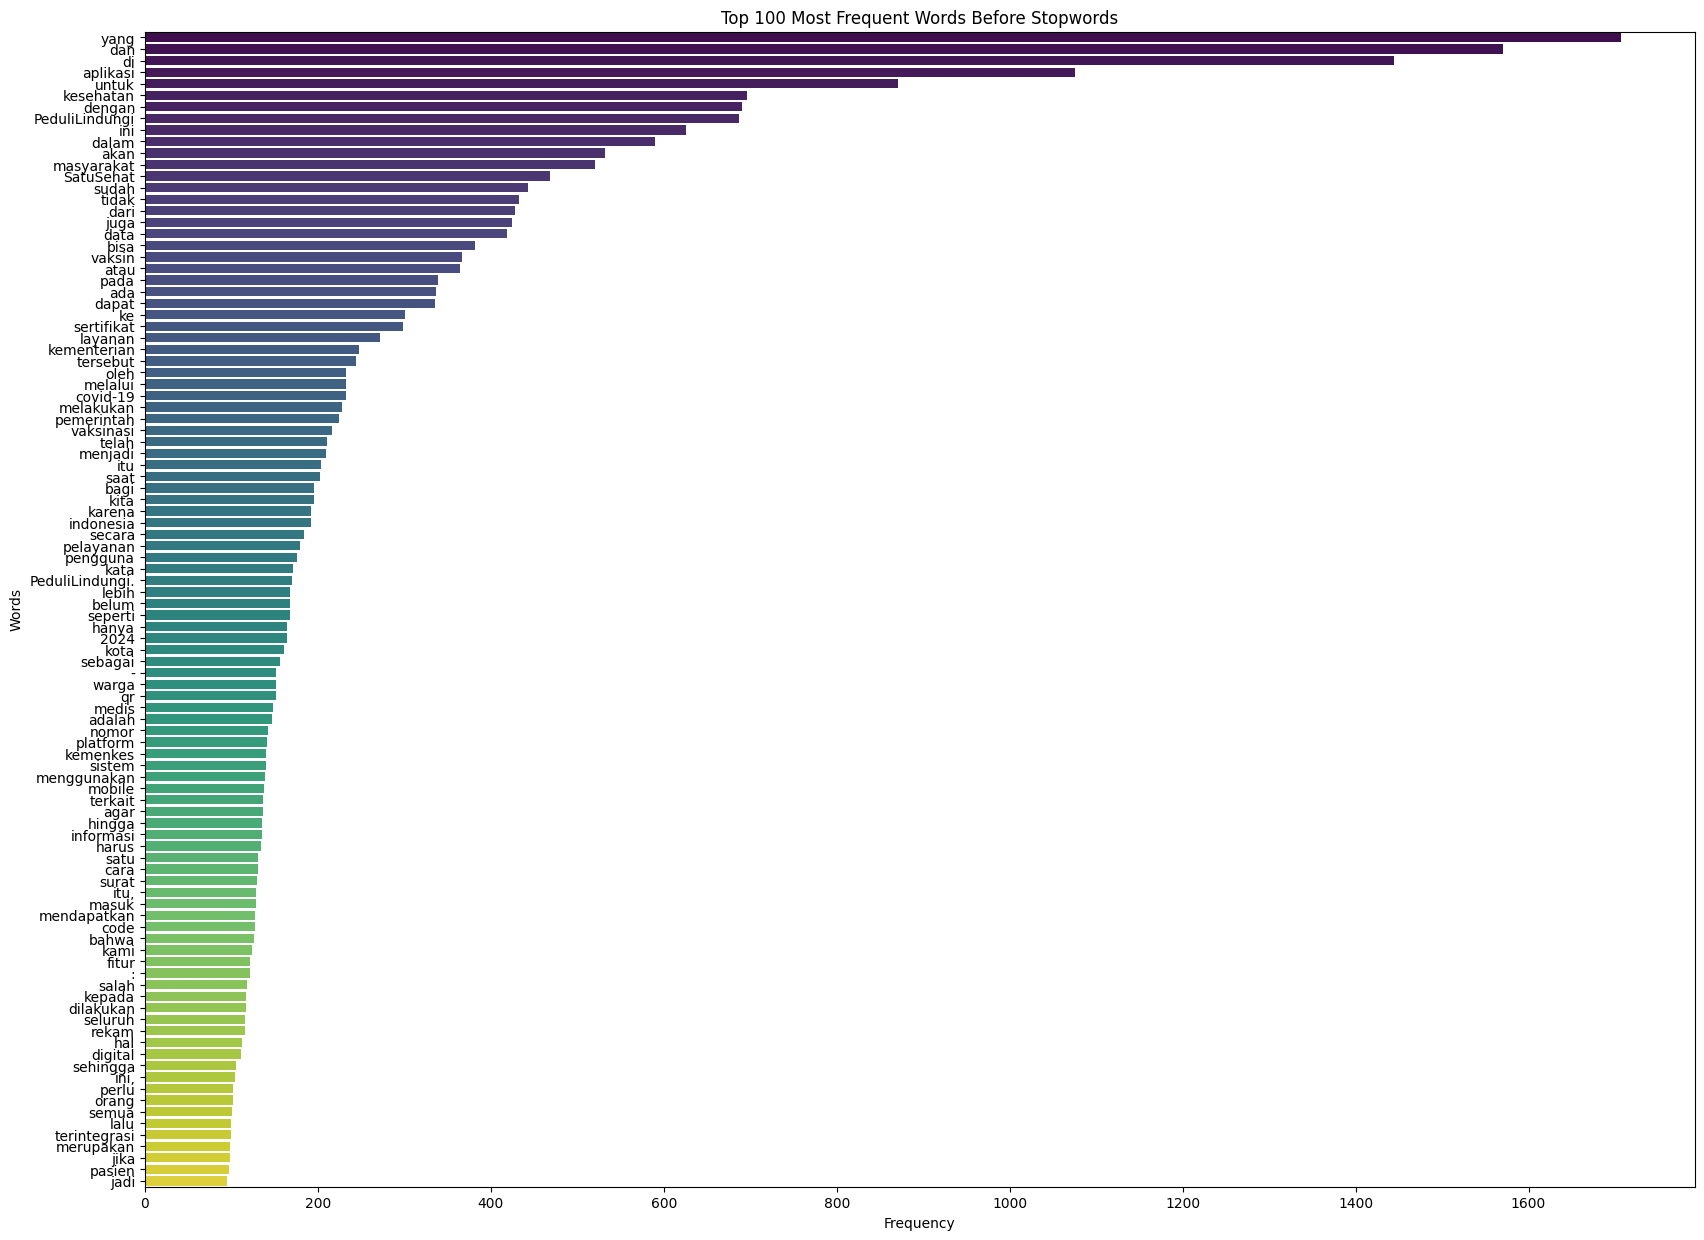

In [30]:
from collections import Counter

# Menggabungkan semua teks dalam kolom 'content' menjadi satu string
all_words = ' '.join(satusehat_news_df['content'])

# Menghitung frekuensi kata dan mendapatkan top 100
word_freq = Counter(all_words.split())
top_100_words = dict(word_freq.most_common(100))

# Menyimpan frekuensi kata sebagai DataFrame
top_100_df = pd.DataFrame(top_100_words.items(), columns=['word', 'frequency'])

# Mengurutkan DataFrame berdasarkan frekuensi
top_100_df = top_100_df.sort_values(by='frequency', ascending=False)

# Membuat diagram batang
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_df, x='frequency', y='word', palette='viridis')
plt.title("Top 100 Most Frequent Words Before Stopwords")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

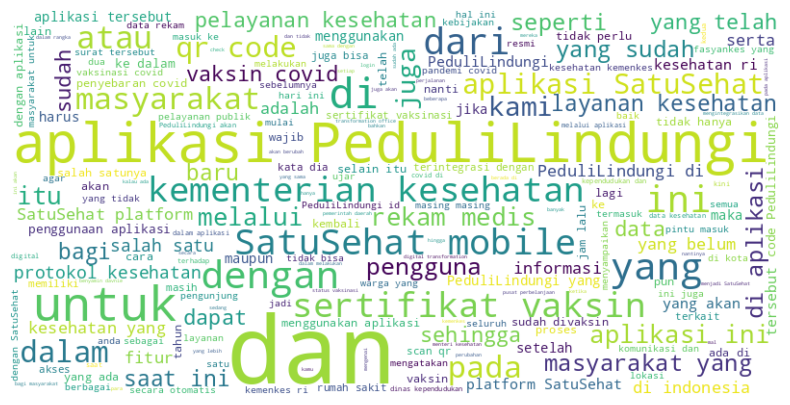

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam kolom 'content' menjadi satu string
all_words = ' '.join(satusehat_news_df['content'])

# Membuat WordCloud dari seluruh kata dalam kolom 'content'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'satusehat_news_df_before_stopwords.csv'
satusehat_news_df.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df_before_stopwords.csv


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'satusehat_news_df_before_stopwords.xlsx'
satusehat_news_df.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df_before_stopwords.xlsx


## Menghapus tanda baca

In [43]:
# Membuat DataFrame baru dengan kolom-kolom yang dipilih dari satusehat_news_df
satusehat_news_df_stopwords = satusehat_news_df[['link', 'judul', 'tanggal', 'portal', 'content', 'tags', 'status', 'tahun', 'wordCount']].copy()

# Menghapus tanda baca dari kolom 'content' dan menyimpannya di 'content_without_stopwords'
satusehat_news_df_stopwords['content_without_stopwords'] = satusehat_news_df_stopwords['content'].apply(
    lambda x: x.translate(str.maketrans("", "", string.punctuation))
)

# Menampilkan DataFrame setelah menghapus tanda baca
satusehat_news_df_stopwords[['content', 'content_without_stopwords']]

,content,content_without_stopwords
0,"dinilai PeduliLindungi para pekerja, bpjs ke...",dinilai PeduliLindungi para pekerja bpjs ket...
1,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,06 okt 2024 06 okt 2024 polrestabes surabaya 2...
2,bicaranetwork.com - guna menanggulangi penyeba...,bicaranetworkcom guna menanggulangi penyebara...
3,genpi.co - bandara i gusti ngurah rai bali mew...,genpico bandara i gusti ngurah rai bali mewaj...
4,news indonesia . foto: direktur rumah sakit ...,news indonesia foto direktur rumah sakit um...
...,...,...
156,"sidoarjo, beritamerdekaonline.com – kegiatan m...",sidoarjo beritamerdekaonlinecom – kegiatan mul...
157,– diberlakukannya kebijakan pemberlakuan pemb...,– diberlakukannya kebijakan pemberlakuan pemb...
158,"bali, 1 juli 2021 kementerian kesehatan (kemen...",bali 1 juli 2021 kementerian kesehatan kemenke...
159,suara.com - seperti yang telah diketahui bersa...,suaracom seperti yang telah diketahui bersama...


## Text Analysis (Setelah Stopwords)

In [44]:
import requests

# Unduh daftar stopwords dari URL
url = 'https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt'
response = requests.get(url)

# Simpan daftar stopwords ke file lokal
with open('id_stopwords.txt', 'w') as file:
    file.write(response.text)

# Baca stopwords dari file
with open('id_stopwords.txt', 'r') as file:
    stopwords_id = file.read().splitlines()

# Menampilkan beberapa stopwords
print(f"Terdapat total {len(stopwords_id)} kata stopwords dalam bahasa Indonesia:")
print(stopwords_id[:10])  # Menampilkan 10 kata pertama dari daftar stopwords

Terdapat total 758 kata stopwords dalam bahasa Indonesia:
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']


In [45]:
# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text, stopwords_list):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_list]
    return ' '.join(filtered_words)

In [46]:
# Menghapus stopwords dari kolom 'content_without_stopwords'
satusehat_news_df_stopwords['content_without_stopwords'] = satusehat_news_df_stopwords['content_without_stopwords'].apply(lambda x: remove_stopwords(x, stopwords_id))
satusehat_news_df_stopwords[['content', 'content_without_stopwords']]

,content,content_without_stopwords
0,"dinilai PeduliLindungi para pekerja, bpjs ke...",dinilai PeduliLindungi pekerja bpjs ketenagake...
1,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,06 okt 2024 06 okt 2024 polrestabes surabaya 2...
2,bicaranetwork.com - guna menanggulangi penyeba...,bicaranetworkcom menanggulangi penyebaran peny...
3,genpi.co - bandara i gusti ngurah rai bali mew...,genpico bandara i gusti ngurah rai bali mewaji...
4,news indonesia . foto: direktur rumah sakit ...,news indonesia foto direktur rumah sakit daera...
...,...,...
156,"sidoarjo, beritamerdekaonline.com – kegiatan m...",sidoarjo beritamerdekaonlinecom – kegiatan mul...
157,– diberlakukannya kebijakan pemberlakuan pemb...,– diberlakukannya kebijakan pemberlakuan pemba...
158,"bali, 1 juli 2021 kementerian kesehatan (kemen...",bali 1 juli 2021 kementerian kesehatan kemenke...
159,suara.com - seperti yang telah diketahui bersa...,suaracom pelaksanaan program vaksinasi covid19...


<ipython-input-47-512dd7f06d36>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_words_df, x='frequency', y='word', palette='viridis')


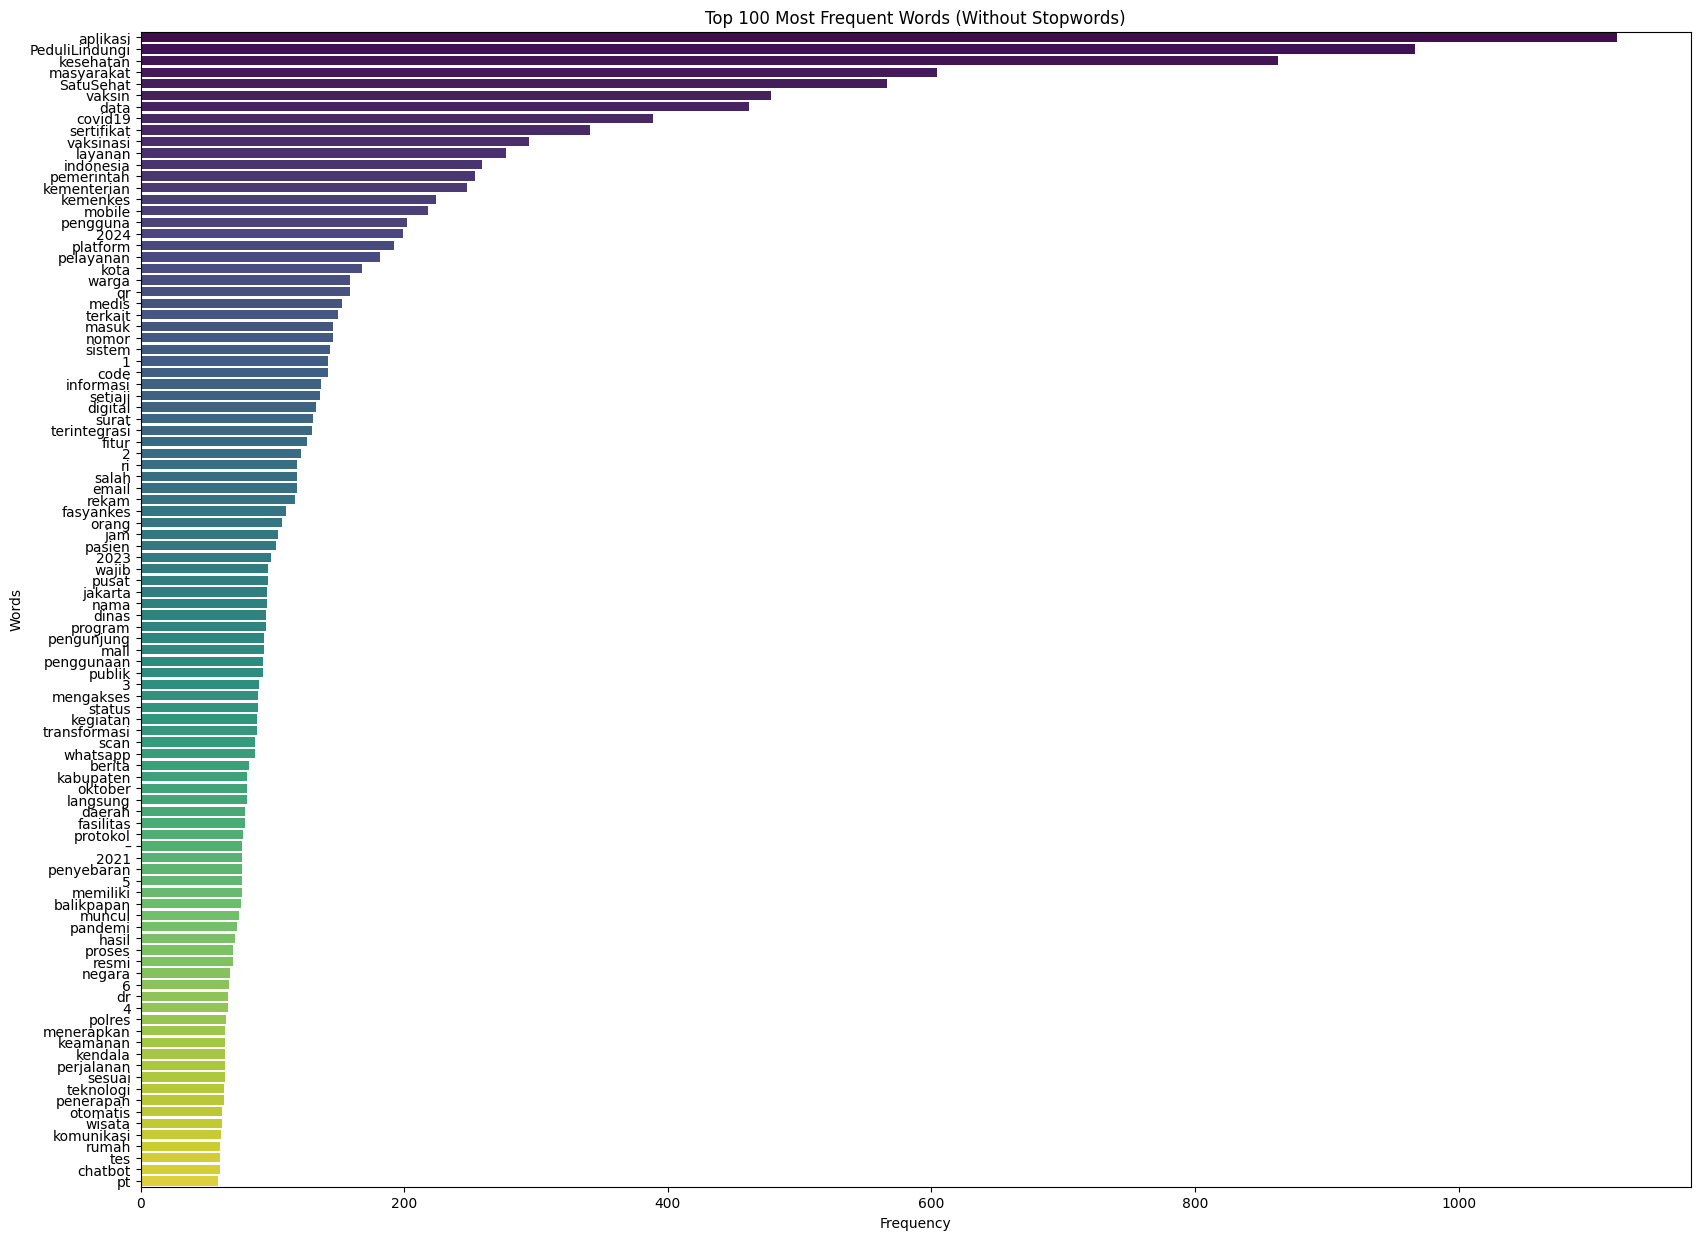

In [47]:
# Menggabungkan semua teks dalam kolom 'content_without_stopwords' menjadi satu string
all_words = ' '.join(satusehat_news_df_stopwords['content_without_stopwords'])

# Menghitung frekuensi kata dan mendapatkan top 100 kata
word_freq = Counter(all_words.split())
top_100_words = dict(word_freq.most_common(100))

# Menyimpan frekuensi kata sebagai DataFrame
top_100_words_df = pd.DataFrame(top_100_words.items(), columns=['word', 'frequency'])

# Mengurutkan DataFrame berdasarkan frekuensi
top_100_words_df = top_100_words_df.sort_values(by='frequency', ascending=False)

# Membuat diagram batang
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_words_df, x='frequency', y='word', palette='viridis')
plt.title("Top 100 Most Frequent Words (Without Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [48]:
# Melihat keseluruhan baris

# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_100_words_df)

# Setelah selesai, Anda bisa mengembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')

              word  frequency
0         aplikasi       1120
1   PeduliLindungi        967
2        kesehatan        863
3       masyarakat        604
4        SatuSehat        566
5           vaksin        478
6             data        462
7          covid19        389
8       sertifikat        341
9        vaksinasi        295
10         layanan        277
11       indonesia        259
12      pemerintah        254
13     kementerian        248
14        kemenkes        224
15          mobile        218
16        pengguna        202
17            2024        199
18        platform        192
19       pelayanan        182
20            kota        168
21           warga        159
22              qr        159
23           medis        153
24         terkait        150
26           masuk        146
25           nomor        146
27          sistem        144
28               1        142
29            code        142
30       informasi        137
31         setiaji        136
32        

In [49]:
# Daftar kata stopwords tambahan yang ingin dihapus
unwanted_words = ["–"]

# Fungsi untuk menghapus stopwords dan kata yang tidak diinginkan
def remove_unwanted_words(text, words):
    # Split teks menjadi kata-kata, lalu filter kata yang tidak ada dalam daftar kata yang dihapus
    cleaned_text = ' '.join([word for word in text.split() if word.lower() not in words])
    return cleaned_text

# Terapkan fungsi untuk membersihkan kolom 'content_without_stopwords'
satusehat_news_df_stopwords['content_without_stopwords'] = satusehat_news_df_stopwords['content_without_stopwords'].apply(
    lambda x: remove_unwanted_words(x, unwanted_words)
)

<ipython-input-50-2b564feadacb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_words_df, x='frequency', y='word', palette='viridis')


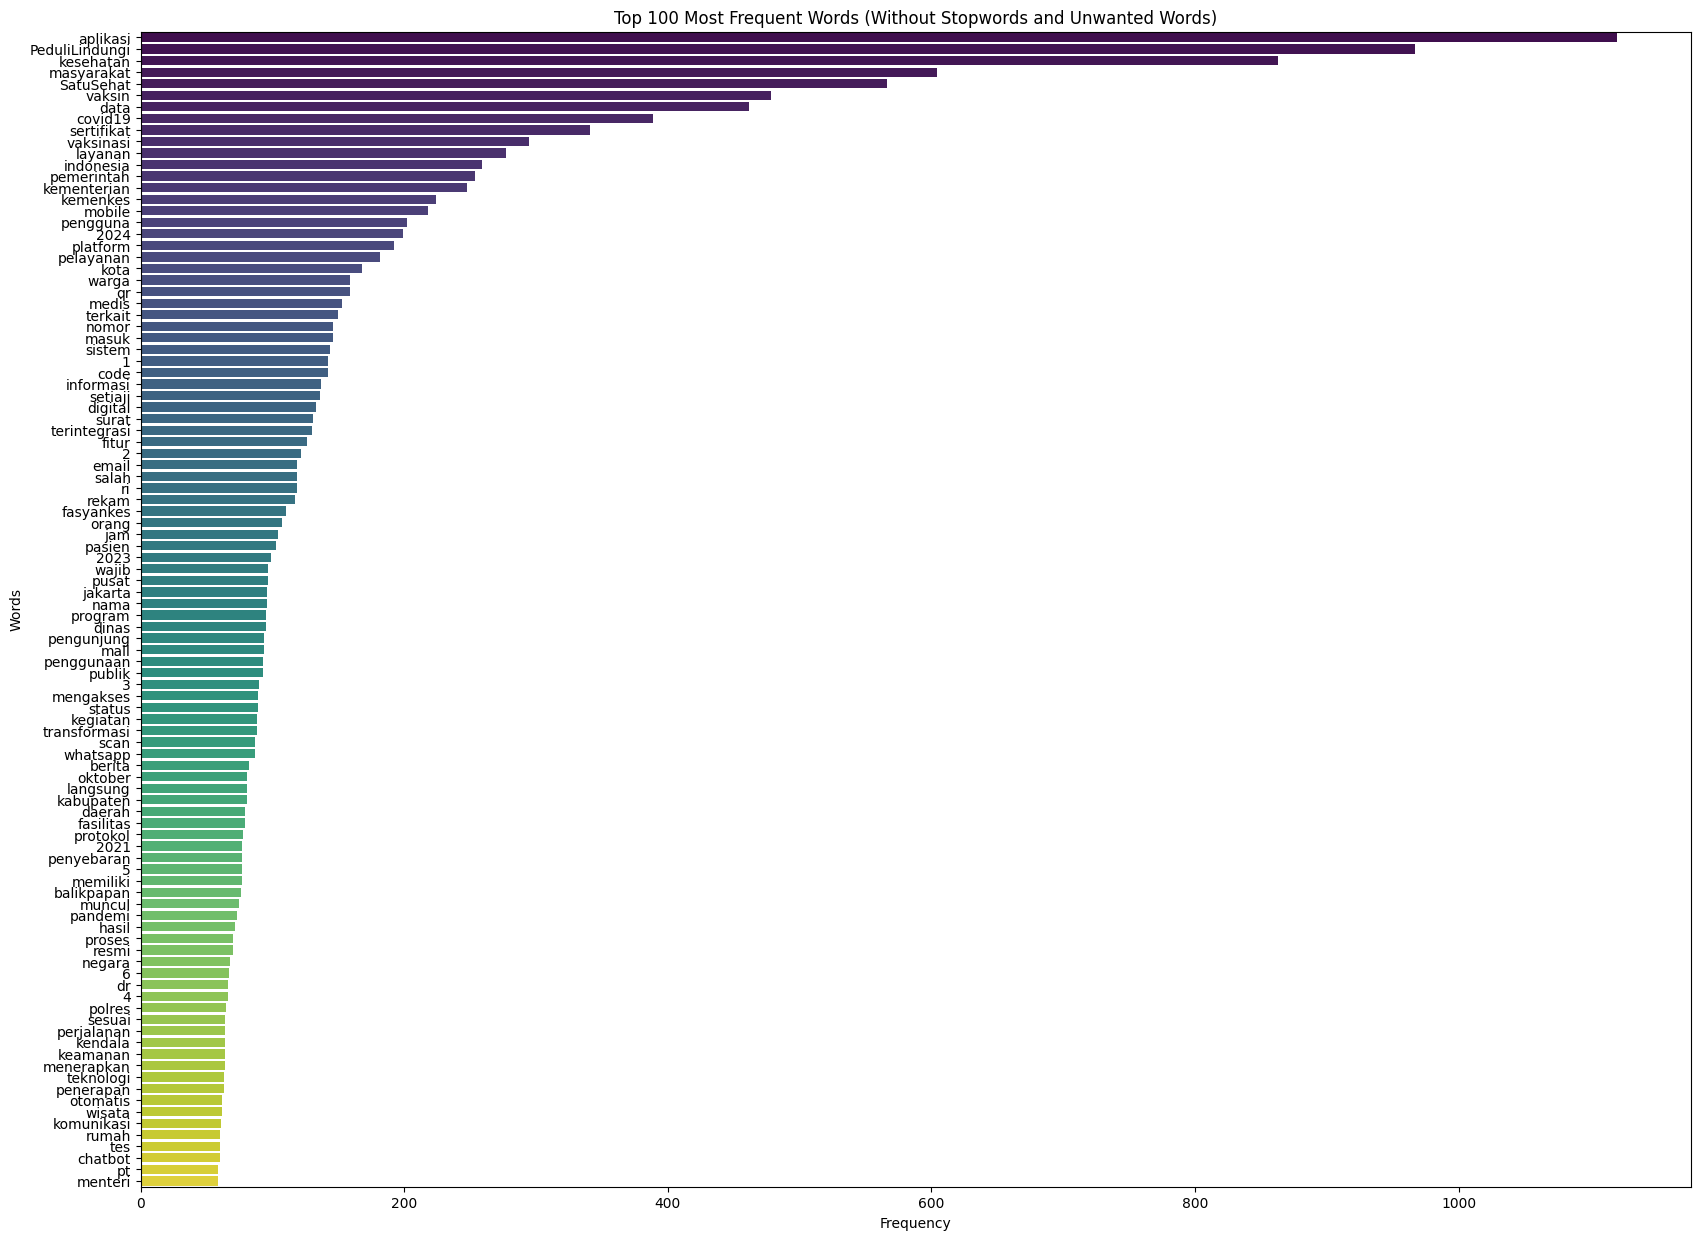

In [50]:
# Menggabungkan semua teks dalam kolom 'content_without_stopwords' yang telah dibersihkan
all_words = ' '.join(satusehat_news_df_stopwords['content_without_stopwords'])

# Menghitung frekuensi kata dan mendapatkan top 100 kata setelah pembersihan
word_freq = Counter(all_words.split())
top_100_words = dict(word_freq.most_common(100))

# Menyimpan frekuensi kata sebagai DataFrame
top_100_words_df = pd.DataFrame(top_100_words.items(), columns=['word', 'frequency'])

# Membuat diagram batang dari frekuensi kata
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_words_df, x='frequency', y='word', palette='viridis')
plt.title("Top 100 Most Frequent Words (Without Stopwords and Unwanted Words)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

<ipython-input-54-99d4e68945a2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_words_df, x='frequency', y='word', palette='viridis')


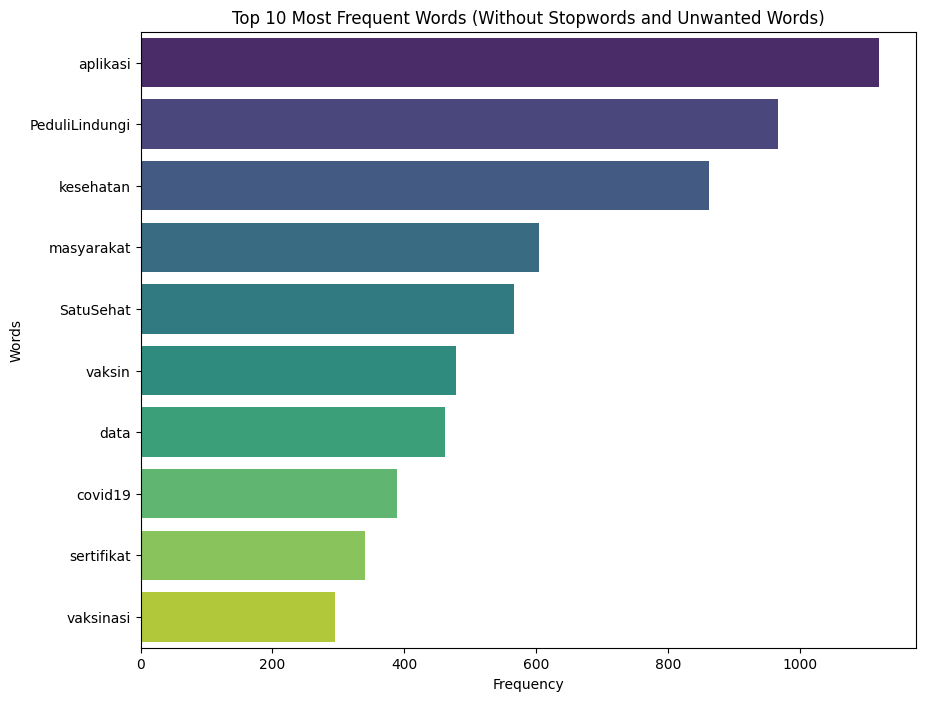

In [54]:
# Menggabungkan semua teks dalam kolom 'content_without_stopwords' yang telah dibersihkan
all_words = ' '.join(satusehat_news_df_stopwords['content_without_stopwords'])

# Menghitung frekuensi kata dan mendapatkan top 10 kata setelah pembersihan
word_freq = Counter(all_words.split())
top_10_words = dict(word_freq.most_common(10))

# Menyimpan frekuensi kata sebagai DataFrame
top_10_words_df = pd.DataFrame(top_10_words.items(), columns=['word', 'frequency'])

# Membuat diagram batang dari frekuensi kata
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_words_df, x='frequency', y='word', palette='viridis')
plt.title("Top 10 Most Frequent Words (Without Stopwords and Unwanted Words)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [51]:
# Menambahkan kolom wordcount_after_stopwords
satusehat_news_df_stopwords['wordcount_after_stopwords'] = satusehat_news_df_stopwords['content_without_stopwords'].apply(lambda x: len(x.split()))

In [52]:
satusehat_news_df_stopwords.loc[:,['judul', 'content', 'wordCount', 'content_without_stopwords', 'wordcount_after_stopwords']]

,judul,content,wordCount,content_without_stopwords,wordcount_after_stopwords
0,"dinilai PeduliLindungi para pekerja, bpjs kete...","dinilai PeduliLindungi para pekerja, bpjs ke...",604,dinilai PeduliLindungi pekerja bpjs ketenagake...,373
1,pemerintah tingkatkan layanan haji dan umrah m...,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,488,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315
2,tutorial cara isi formulir SatuSehat pasca pul...,bicaranetwork.com - guna menanggulangi penyeba...,365,bicaranetworkcom menanggulangi penyebaran peny...,211
3,bandara i gusti ngurah rai wajibkan penumpang ...,genpi.co - bandara i gusti ngurah rai bali mew...,219,genpico bandara i gusti ngurah rai bali mewaji...,129
4,"transformasi digital, rsud moh anwar sumenep b...",news indonesia . foto: direktur rumah sakit ...,542,news indonesia foto direktur rumah sakit daera...,292
...,...,...,...,...,...
156,perumahan tas blok m & n motto satgas “PeduliL...,"sidoarjo, beritamerdekaonline.com – kegiatan m...",698,sidoarjo beritamerdekaonlinecom kegiatan mulia...,408
157,masih bingung? ini tips mudah download dan cet...,– diberlakukannya kebijakan pemberlakuan pemb...,470,diberlakukannya kebijakan pemberlakuan pembata...,272
158,kemenkes luncurkan qr code untuk aplikasi Pedu...,"bali, 1 juli 2021 kementerian kesehatan (kemen...",750,bali 1 juli 2021 kementerian kesehatan kemenke...,427
159,cara mendapatkan vaksin covid-19 gratis dari p...,suara.com - seperti yang telah diketahui bersa...,653,suaracom pelaksanaan program vaksinasi covid19...,355


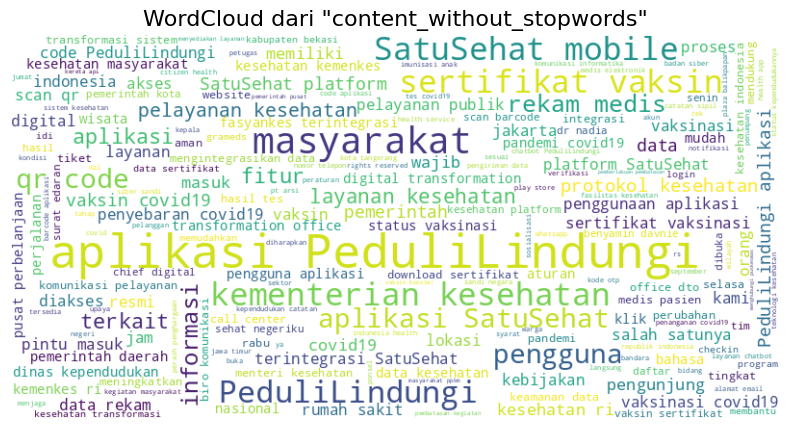

In [53]:
# Gabungkan semua teks dari kolom 'content_without_stopwords' menjadi satu string
text = ' '.join(satusehat_news_df_stopwords['content_without_stopwords'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title('WordCloud dari "content_without_stopwords"', fontsize=16)
plt.show()

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'satusehat_news_df_after_stopwords.csv'
satusehat_news_df_stopwords.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df_after_stopwords.csv


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'satusehat_news_df_after_stopwords.xlsx'
satusehat_news_df_stopwords.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df_after_stopwords.xlsx


## Stemming

In [ ]:
# Mengunduh library untuk stemming Bahasa Indonesia
!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Fungsi untuk stemming
def stemming_indonesia(text):
    if text is not None:
        # Lakukan stemming dan kembalikan hasilnya
        return stemmer.stem(text)
    return ''

In [ ]:
# Terapkan stemming pada kolom 'content_without_stopwords'
satusehat_news_df_stopwords['content_stem_without_stopwords'] = satusehat_news_df_stopwords['content_without_stopwords'].apply(stemming_indonesia)

# Menampilkan hasil untuk beberapa baris
satusehat_news_df_stopwords.loc[0:3, ['content_without_stopwords', 'content_stem_without_stopwords']]

,content_without_stopwords,content_stem_without_stopwords
0,dinilai PeduliLindungi pekerja bpjs ketenagake...,nilai pedulilindungi kerja bpjs ketenagakerjaa...
1,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,06 okt 2024 06 okt 2024 polrestabes surabaya 2...
2,bicaranetworkcom menanggulangi penyebaran peny...,bicaranetworkcom tanggulang sebar sakit cacar ...
3,genpico bandara i gusti ngurah rai bali mewaji...,genpico bandara i gusti ngurah rai bal wajib t...


In [ ]:
satusehat_news_df_stopwords['wordcount_stem_without_stopwords'] = satusehat_news_df_stopwords['content_stem_without_stopwords'].apply(lambda x: len(x.split()))

In [ ]:
satusehat_news_df_stopwords.loc[:,['judul', 'content', 'wordCount', 'content_stem_without_stopwords', 'wordcount_stem_without_stopwords']]

,judul,content,wordCount,content_stem_without_stopwords,wordcount_stem_without_stopwords
0,"dinilai PeduliLindungi para pekerja, bpjs kete...","dinilai PeduliLindungi para pekerja, bpjs ke...",604,nilai pedulilindungi kerja bpjs ketenagakerjaa...,372
1,pemerintah tingkatkan layanan haji dan umrah m...,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,488,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315
2,tutorial cara isi formulir SatuSehat pasca pul...,bicaranetwork.com - guna menanggulangi penyeba...,365,bicaranetworkcom tanggulang sebar sakit cacar ...,211
3,bandara i gusti ngurah rai wajibkan penumpang ...,genpi.co - bandara i gusti ngurah rai bali mew...,219,genpico bandara i gusti ngurah rai bal wajib t...,129
4,"transformasi digital, rsud moh anwar sumenep b...",news indonesia . foto: direktur rumah sakit ...,542,news indonesia foto direktur rumah sakit daera...,292
...,...,...,...,...,...
156,perumahan tas blok m & n motto satgas “PeduliL...,"sidoarjo, beritamerdekaonline.com – kegiatan m...",698,sidoarjo beritamerdekaonlinecom giat mulia war...,398
157,masih bingung? ini tips mudah download dan cet...,– diberlakukannya kebijakan pemberlakuan pemb...,470,laku bijak laku batas giat masyarakat ppkm dar...,272
158,kemenkes luncurkan qr code untuk aplikasi Pedu...,"bali, 1 juli 2021 kementerian kesehatan (kemen...",750,bal 1 juli 2021 menteri sehat kemenkes perinta...,427
159,cara mendapatkan vaksin covid-19 gratis dari p...,suara.com - seperti yang telah diketahui bersa...,653,suaracom laksana program vaksinasi covid19 ind...,355


<ipython-input-56-3de01276e8f6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


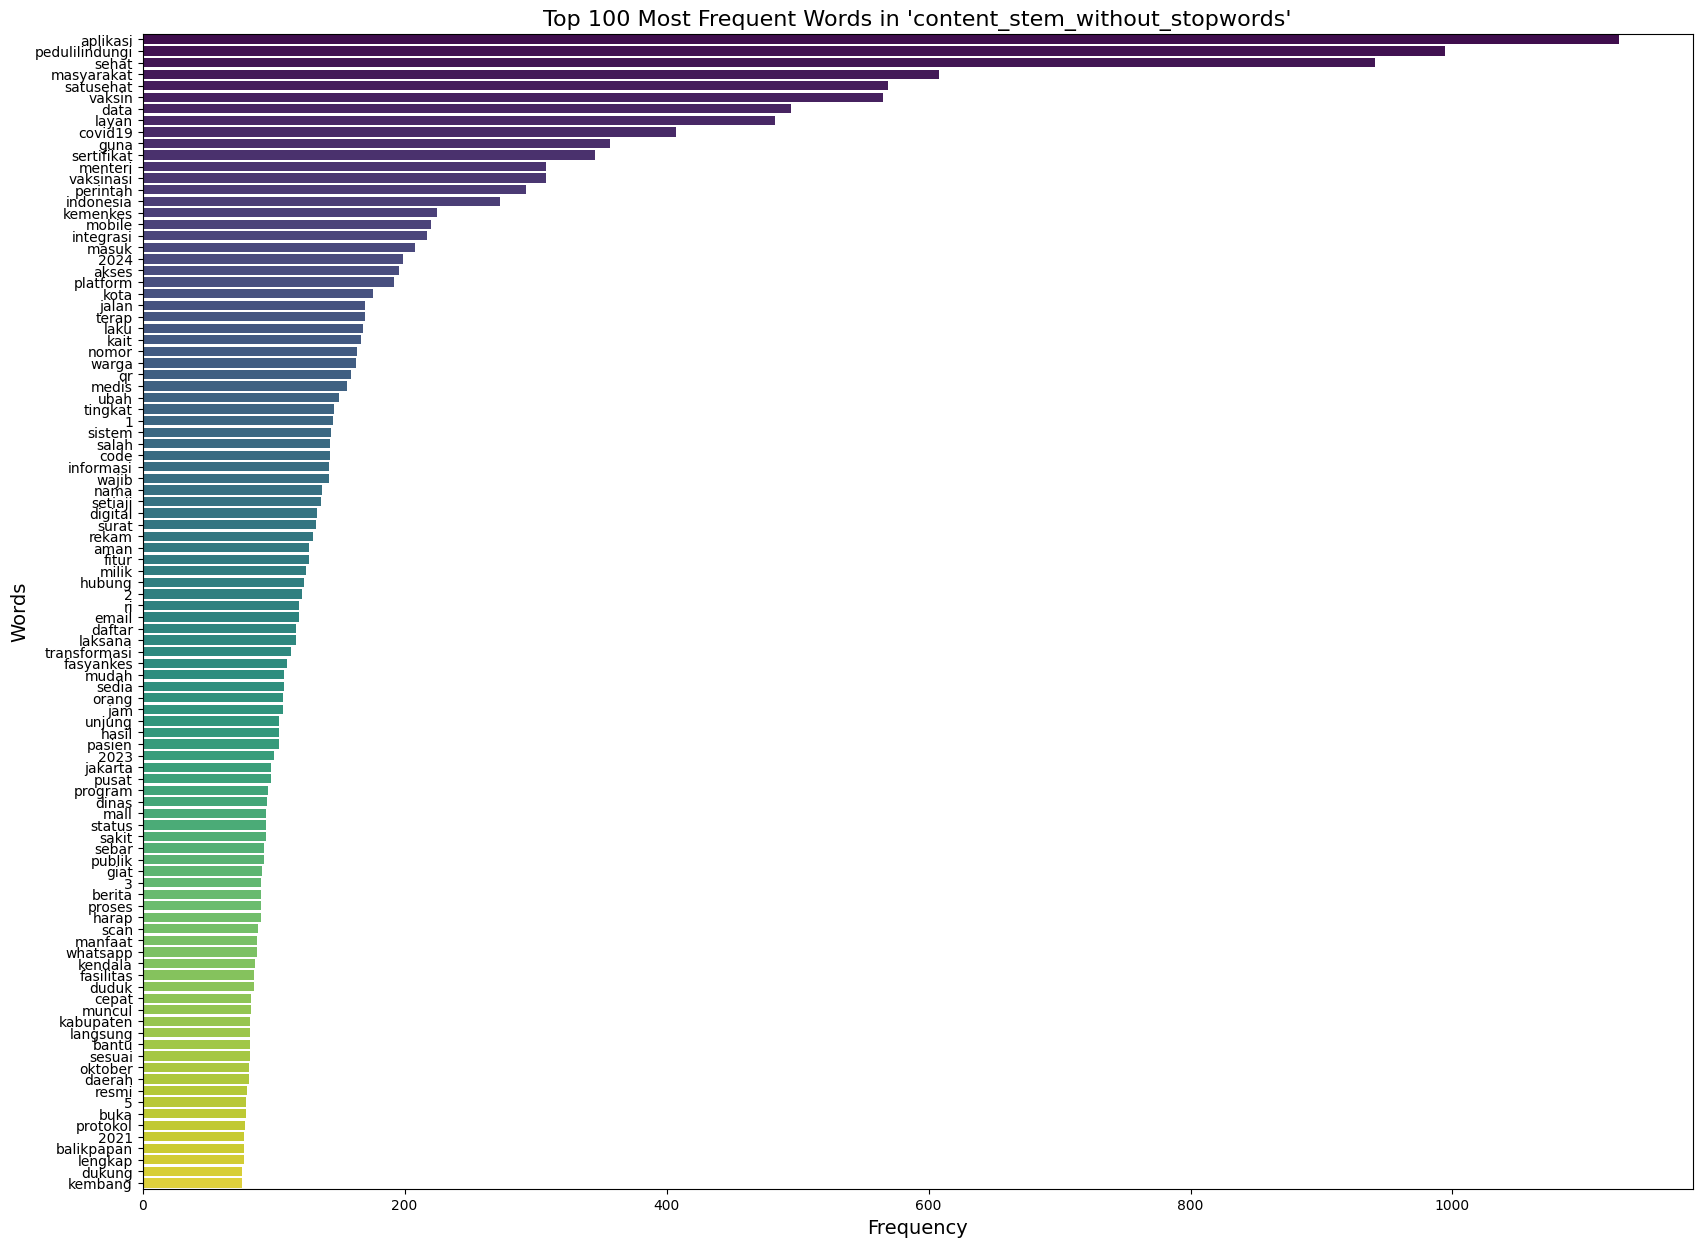

In [ ]:
from collections import Counter

# Gabungkan semua teks dalam kolom 'content_stem_without_stopwords' menjadi satu string
all_words = ' '.join(satusehat_news_df_stopwords['content_stem_without_stopwords'].tolist())

# Pisahkan string menjadi daftar kata
word_list = all_words.split()

# Hitung frekuensi kata
word_freq = Counter(word_list)

# Konversi hasil ke DataFrame
freq_stem_without_stopwords = pd.DataFrame(word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

# Ambil top 100 kata yang paling sering muncul
top_n = 100
top_words = freq_stem_without_stopwords.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(20, 15))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'content_stem_without_stopwords'", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

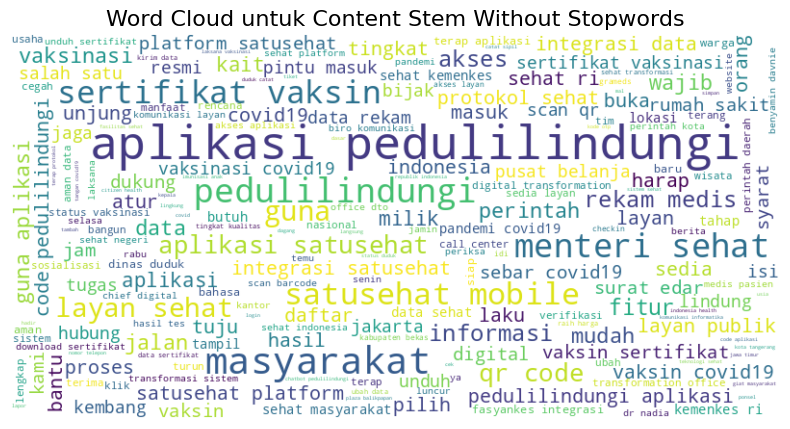

In [ ]:
# Buat Word Cloud untuk 'content_stem_without_stopwords'
wordcloud_stem = WordCloud(width=800, height=400, background_color='white').generate(' '.join(satusehat_news_df_stopwords['content_stem_without_stopwords']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stem, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Content Stem Without Stopwords', fontsize=16)
plt.show()

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'satusehat_news_df_after_stopwords_stemming.csv'
satusehat_news_df_stopwords.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df_after_stopwords_stemming.csv


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'satusehat_news_df_after_stopwords_stemming.xlsx'
satusehat_news_df_stopwords.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df_after_stopwords_stemming.xlsx


## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

# Unduh data yang diperlukan untuk lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

# Buat objek lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Fungsi untuk melakukan lemmatization
def lemmatize_indonesia(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
# Terapkan lemmatization pada kolom 'content_without_stopwords'
satusehat_news_df_stopwords['content_lemmatized'] = satusehat_news_df_stopwords['content_without_stopwords'].apply(lemmatize_indonesia)

# Menampilkan hasil untuk beberapa baris
satusehat_news_df_stopwords.loc[0:3, ['content_without_stopwords', 'content_lemmatized']]

,content_without_stopwords,content_lemmatized
0,dinilai PeduliLindungi pekerja bpjs ketenagake...,dinilai PeduliLindungi pekerja bpjs ketenagake...
1,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,06 okt 2024 06 okt 2024 polrestabes surabaya 2...
2,bicaranetworkcom menanggulangi penyebaran peny...,bicaranetworkcom menanggulangi penyebaran peny...
3,genpico bandara i gusti ngurah rai bali mewaji...,genpico bandara i gusti ngurah rai bali mewaji...


In [ ]:
satusehat_news_df_stopwords['wordcount_lemmatized'] = satusehat_news_df_stopwords['content_lemmatized'].apply(lambda x: len(x.split()))

In [ ]:
satusehat_news_df_stopwords.loc[:,['judul', 'content', 'wordCount', 'content_lemmatized', 'wordcount_lemmatized']]

,judul,content,wordCount,content_lemmatized,wordcount_lemmatized
0,"dinilai PeduliLindungi para pekerja, bpjs kete...","dinilai PeduliLindungi para pekerja, bpjs ke...",604,dinilai PeduliLindungi pekerja bpjs ketenagake...,373
1,pemerintah tingkatkan layanan haji dan umrah m...,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,488,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315
2,tutorial cara isi formulir SatuSehat pasca pul...,bicaranetwork.com - guna menanggulangi penyeba...,365,bicaranetworkcom menanggulangi penyebaran peny...,211
3,bandara i gusti ngurah rai wajibkan penumpang ...,genpi.co - bandara i gusti ngurah rai bali mew...,219,genpico bandara i gusti ngurah rai bali mewaji...,129
4,"transformasi digital, rsud moh anwar sumenep b...",news indonesia . foto: direktur rumah sakit ...,542,news indonesia foto direktur rumah sakit daera...,292
...,...,...,...,...,...
156,perumahan tas blok m & n motto satgas “PeduliL...,"sidoarjo, beritamerdekaonline.com – kegiatan m...",698,sidoarjo beritamerdekaonlinecom kegiatan mulia...,408
157,masih bingung? ini tips mudah download dan cet...,– diberlakukannya kebijakan pemberlakuan pemb...,470,diberlakukannya kebijakan pemberlakuan pembata...,272
158,kemenkes luncurkan qr code untuk aplikasi Pedu...,"bali, 1 juli 2021 kementerian kesehatan (kemen...",750,bali 1 juli 2021 kementerian kesehatan kemenke...,427
159,cara mendapatkan vaksin covid-19 gratis dari p...,suara.com - seperti yang telah diketahui bersa...,653,suaracom pelaksanaan program vaksinasi covid19...,355


In [ ]:
# Fungsi untuk menghitung frekuensi kata
def get_word_frequencies(text_series):
    # Gabungkan semua teks dalam satu string
    all_words = ' '.join(text_series).split()
    # Hitung frekuensi kata menggunakan Counter
    word_counts = Counter(all_words)
    # Konversi ke DataFrame
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
    return freq_df

In [ ]:
# Hitung frekuensi untuk kolom 'content_lemmatized'
freq_lemmatized = get_word_frequencies(satusehat_news_df_stopwords['content_lemmatized'])
freq_lemmatized.sort_values(by='count', ascending=False, inplace=True)

<ipython-input-67-31e0c074054d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


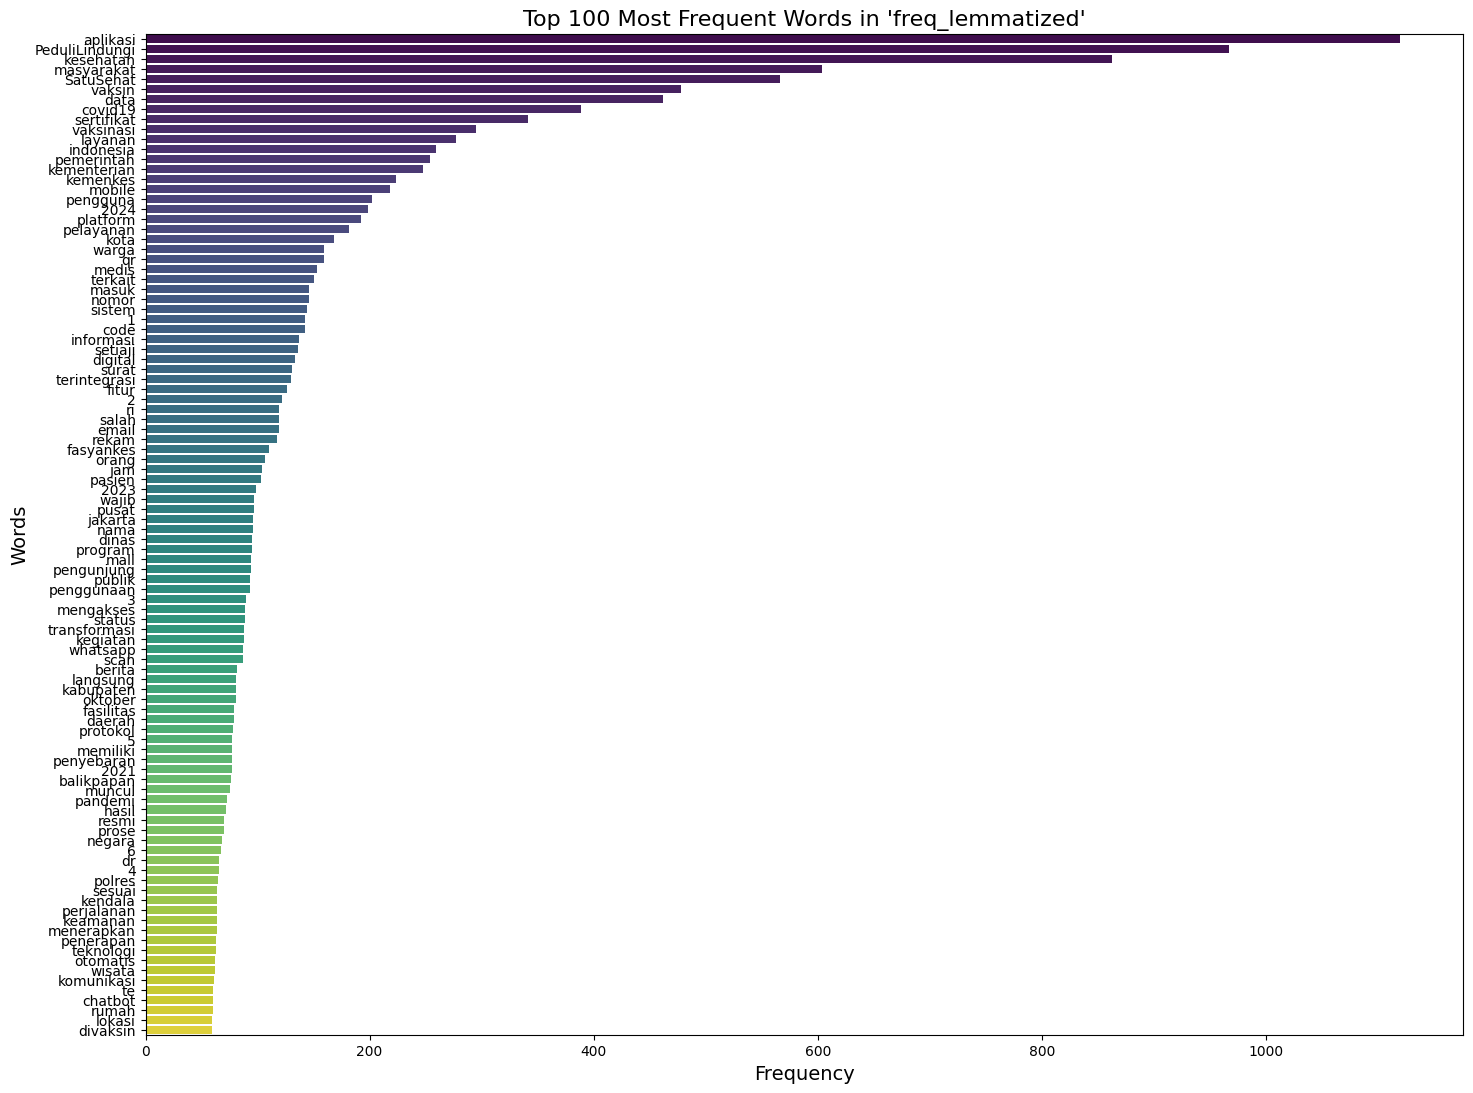

In [ ]:
# Ambil top 100 kata yang paling sering muncul
top_n = 100
top_words = freq_lemmatized.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'freq_lemmatized'", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

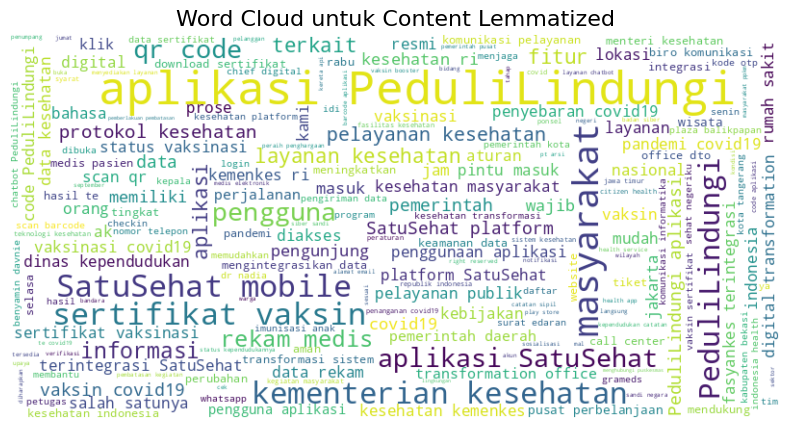

In [ ]:
wordcloud_lemmatized = WordCloud(width=800, height=400, background_color='white').generate(' '.join(satusehat_news_df_stopwords['content_lemmatized']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_lemmatized, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Content Lemmatized', fontsize=16)
plt.show()


In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'satusehat_news_df_after_stopwords_lemm.csv'
satusehat_news_df_stopwords.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke satusehat_news_df_after_stopwords_lemm.csv


In [ ]:
# Menyimpan DataFrame ke file Excel
satusehat_news_df_stopwords.to_excel('satusehat_news_df_after_stopwords_lemm.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke satusehat_news_df_after_stopwords_lemm.xlsx")

DataFrame berhasil disimpan ke satusehat_news_df_after_stopwords_lemm.xlsx


In [ ]:
satusehat_news_df_stopwords

,link,judul,tanggal,portal,content,tags,status,tahun,wordCount,content_without_stopwords,wordcount_after_stopwords,content_stem_without_stopwords,wordcount_stem_without_stopwords,content_lemmatized,wordcount_lemmatized
0,https://cahayasiang.id/dinilai-peduli-lindungi...,"dinilai PeduliLindungi para pekerja, bpjs kete...",2024-09-22,Cahaya Siang,"dinilai PeduliLindungi para pekerja, bpjs ke...",Tidak ada tags,success,2024,604,dinilai PeduliLindungi pekerja bpjs ketenagake...,373,nilai pedulilindungi kerja bpjs ketenagakerjaa...,372,dinilai PeduliLindungi pekerja bpjs ketenagake...,373
1,https://memorandum.disway.id/read/114165/pemer...,pemerintah tingkatkan layanan haji dan umrah m...,2024-09-15,Memorandum.co.id,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,"ketua fk patuh jatim,vaksin maningitis,satu se...",success,2024,488,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315,06 okt 2024 06 okt 2024 polrestabes surabaya 2...,315
2,https://www.bicaranetwork.com/kesehatan/295134...,tutorial cara isi formulir SatuSehat pasca pul...,2024-09-06,Bicara Network,bicaranetwork.com - guna menanggulangi penyeba...,"mpox, Satu Sehat, cara isi formulir",success,2024,365,bicaranetworkcom menanggulangi penyebaran peny...,211,bicaranetworkcom tanggulang sebar sakit cacar ...,211,bicaranetworkcom menanggulangi penyebaran peny...,211
3,https://www.genpi.co/kesehatan/245752/bandara-...,bandara i gusti ngurah rai wajibkan penumpang ...,2024-09-06,GenPI.co,genpi.co - bandara i gusti ngurah rai bali mew...,"Berita terkini mpox, cacar monyet, Monkeypox,...",success,2024,219,genpico bandara i gusti ngurah rai bali mewaji...,129,genpico bandara i gusti ngurah rai bal wajib t...,129,genpico bandara i gusti ngurah rai bali mewaji...,129
4,https://newsindonesia.co.id/read/berita-sumene...,"transformasi digital, rsud moh anwar sumenep b...",2024-02-01,newsindonesia.co.id,news indonesia . foto: direktur rumah sakit ...,Tidak ada tags,success,2024,542,news indonesia foto direktur rumah sakit daera...,292,news indonesia foto direktur rumah sakit daera...,292,news indonesia foto direktur rumah sakit daera...,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,https://www.beritamerdekaonline.com/2021/07/pe...,perumahan tas blok m & n motto satgas “PeduliL...,2021-07-21,Berita Merdeka Online,"sidoarjo, beritamerdekaonline.com – kegiatan m...",Tidak ada tags,success,2021,698,sidoarjo beritamerdekaonlinecom kegiatan mulia...,408,sidoarjo beritamerdekaonlinecom giat mulia war...,398,sidoarjo beritamerdekaonlinecom kegiatan mulia...,408
157,https://www.idxchannel.com/economics/masih-bin...,masih bingung? ini tips mudah download dan cet...,2021-07-12,IDX Channel,– diberlakukannya kebijakan pemberlakuan pemb...,"IDX, BEI, Pasar modal, Vakinsasi",success,2021,470,diberlakukannya kebijakan pemberlakuan pembata...,272,laku bijak laku batas giat masyarakat ppkm dar...,272,diberlakukannya kebijakan pemberlakuan pembata...,272
158,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,kemenkes luncurkan qr code untuk aplikasi Pedu...,2021-07-01,Sehat Negeriku,"bali, 1 juli 2021 kementerian kesehatan (kemen...",Tidak ada tags,success,2021,750,bali 1 juli 2021 kementerian kesehatan kemenke...,427,bal 1 juli 2021 menteri sehat kemenkes perinta...,427,bali 1 juli 2021 kementerian kesehatan kemenke...,427
159,https://www.suara.com/health/2021/01/18/114052...,cara mendapatkan vaksin covid-19 gratis dari p...,2021-01-18,Suara.com,suara.com - seperti yang telah diketahui bersa...,"cara mendapatkan vaksin Covid-19 gratis, Vaksi...",success,2021,653,suaracom pelaksanaan program vaksinasi covid19...,355,suaracom laksana program vaksinasi covid19 ind...,355,suaracom pelaksanaan program vaksinasi covid19...,355


## Sentiment Analysis berdasarkan Portal

In [ ]:
# Menghitung frekuensi portal
portal_freq = satusehat_news_df['portal'].value_counts()

# Menampilkan hasil
print(portal_freq)

portal
Sehat Negeriku    6
Liputan6.com      5
CNBC Indonesia    4
Indonesia Baik    4
Jaring News       3
                 ..
DailySocial       1
IDN Times         1
Duta TV           1
Bisnis Tekno      1
Suara.com         1
Name: count, Length: 120, dtype: int64


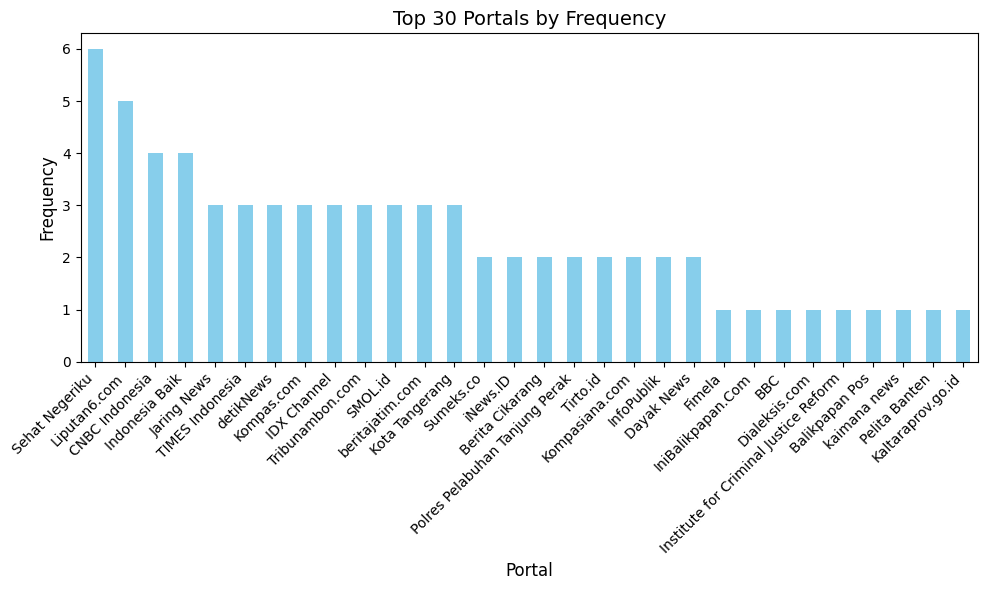

In [ ]:
# Mengambil top 30 portal berdasarkan frekuensi
top_30_portal = portal_freq.head(30)

# Membuat diagram batang (bar plot)
plt.figure(figsize=(10, 6))
top_30_portal.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Top 30 Portals by Frequency', fontsize=14)
plt.xlabel('Portal', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotasi label x untuk lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()